In [3]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:

# Load dataset
DATA_PATH = "../data/processed/cleaned_ckd_data.csv"
df = pd.read_csv(DATA_PATH)

In [5]:
# Display basic info
print("Dataset Shape:", df.shape)
display(df.head())
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape: (201, 29)


,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,2,3,4,4,1,2,5,2,2,2,...,2,2,2,2,2,2,10,0,2,9
1,0,0,2,0,0,0,4,0,0,0,...,0,0,0,0,0,0,11,1,1,8
2,0,0,0,3,0,0,4,0,0,0,...,0,0,0,0,0,0,11,1,1,8
3,0,0,0,5,0,1,4,1,0,1,...,0,0,0,1,0,0,2,1,1,8
4,1,1,0,2,0,0,4,0,0,0,...,0,0,0,0,0,0,2,1,1,8



Missing Values:
bp (Diastolic)    0
bp limit          0
sg                0
al                0
class             0
rbc               0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sod               0
sc                0
pot               0
hemo              0
pcv               0
rbcc              0
wbcc              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
grf               0
stage             0
affected          0
age               0
dtype: int64


In [6]:
# Statistical Summary
print("\nStatistical Summary:")
display(df.describe(include='all'))


Statistical Summary:


,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.547264,0.766169,2.009950,2.437811,0.721393,0.134328,3.651741,0.233831,0.144279,0.064677,...,0.398010,0.358209,0.119403,0.208955,0.18408,0.169154,6.542289,2.845771,0.646766,5.124378
std,0.508925,0.818566,1.720436,1.243931,0.960203,0.356182,0.988994,0.435947,0.366169,0.266075,...,0.500795,0.490963,0.340105,0.419666,0.40118,0.388901,2.662603,1.483609,0.489492,2.177028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,6.000000,1.000000,0.000000,4.000000
50%,1.000000,1.000000,2.000000,3.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,7.000000,3.000000,1.000000,5.000000
75%,1.000000,1.000000,2.000000,3.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,9.000000,4.000000,1.000000,6.000000
max,2.000000,3.000000,5.000000,5.000000,2.000000,2.000000,6.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,11.000000,5.000000,2.000000,10.000000


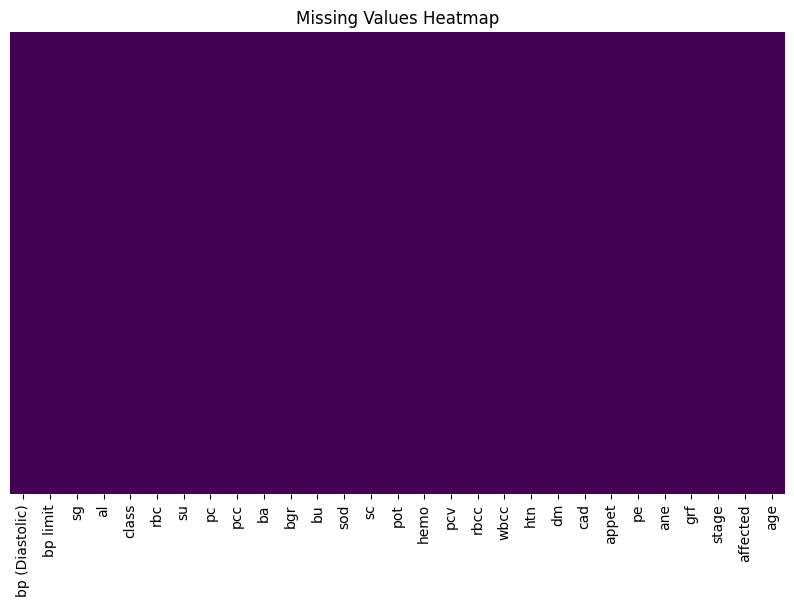

In [7]:
# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

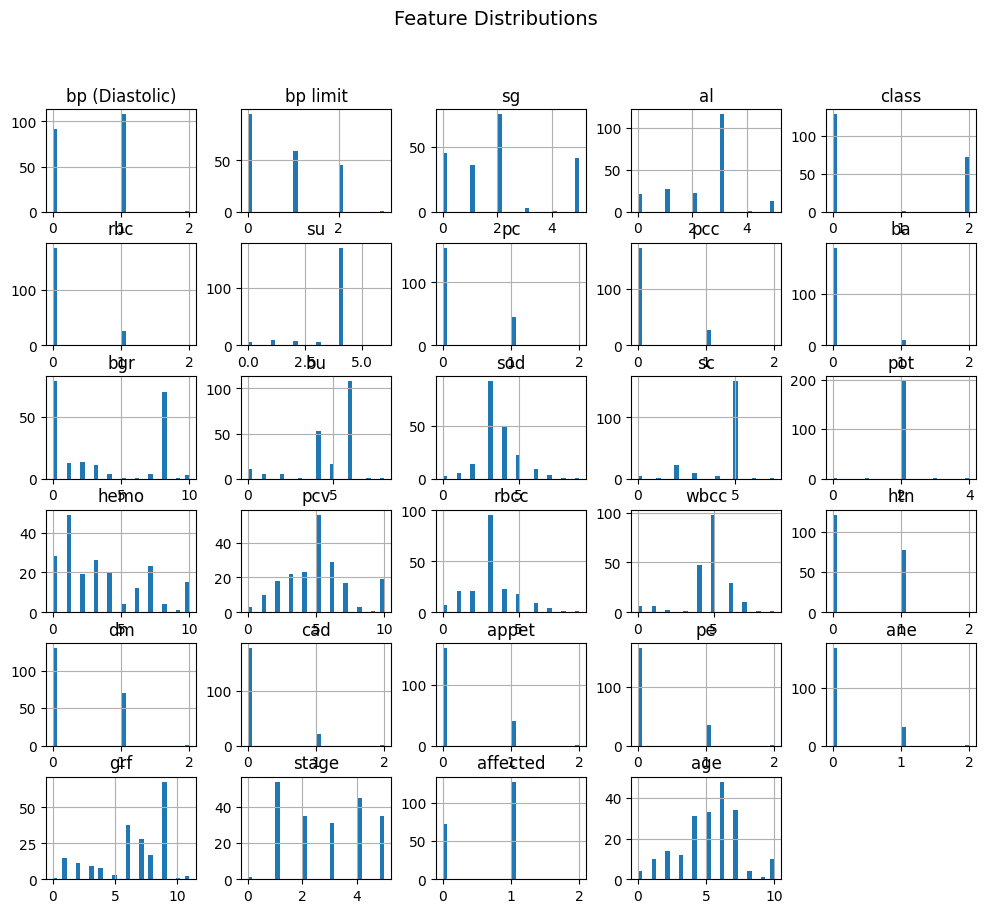

In [8]:
# Distribution of numerical features
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

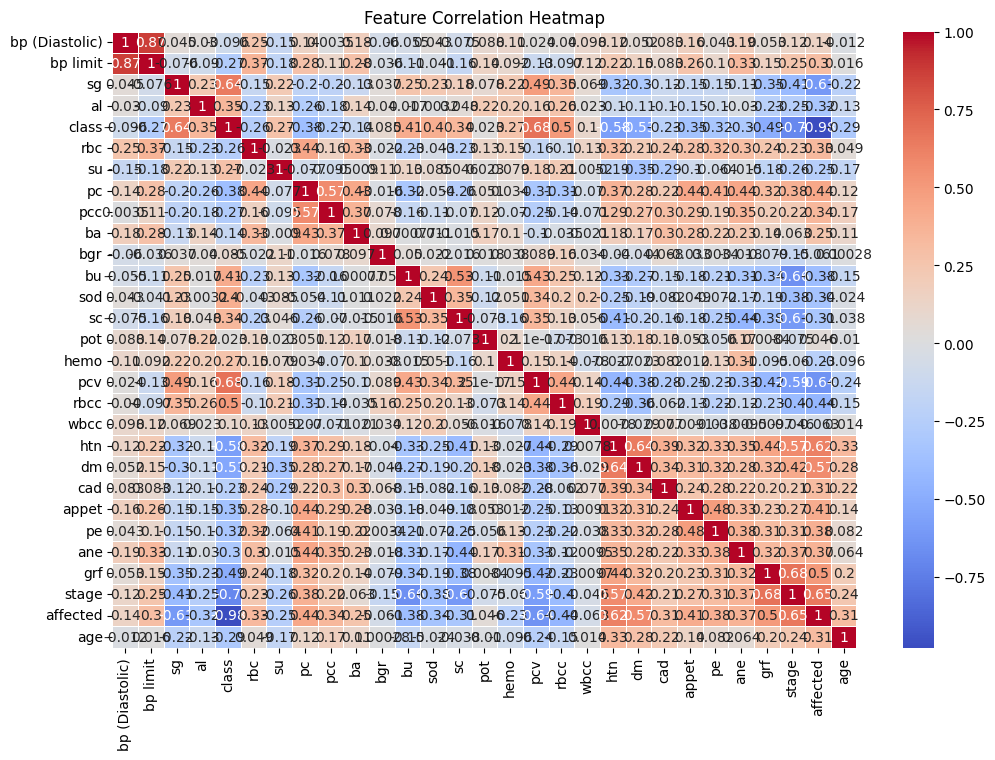

In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
# Pairplot for highly correlated features
sns.pairplot(df, diag_kind='kde', markers="o")
plt.show()


In [11]:

# Categorical feature distributions
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Target Variable Distribution
if 'target' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df['target'], palette="coolwarm")
    plt.title("Target Variable Distribution")
    plt.show()

print("EDA Completed!")


EDA Completed!
